In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker="NQ=F"

import pandas as pd 

data=yf.download(ticker, start='2023-07-1', end='2023-07-20', interval='1m')

data.head()

x=data['Close']

type(x)

y=x.values
type(y)


[*********************100%***********************]  1 of 1 completed


numpy.ndarray

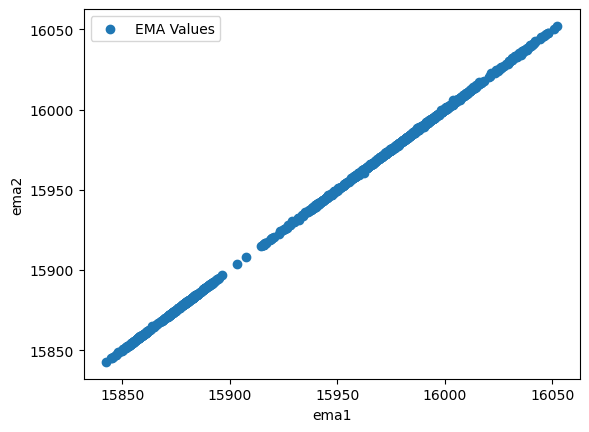

In [149]:
# create a dataframe
stockValues = pd.DataFrame(
    {'Stock_Values': y })
 
# finding EMA
# use any constant value that results in
# good smoothened curve
ema1 = stockValues.ewm(com=0.12).mean()
ema2 = stockValues.ewm(com=0.20).mean() 
# Comparison plot b/w stock values & EMA
#plt.plot(stockValues, label="Stock Values")
plt.scatter(ema1, ema2, label="EMA Values")

plt.xlabel("ema1")
plt.ylabel("ema2")
plt.legend()
plt.show()

In [150]:
new=pd.DataFrame(ema1)
new['ema2']=ema2
new.rename(columns={'Stock_Values':'ema1'} )
new['const']=1
X=['const','ema2']
Y=[new['Stock_Values']]


                            OLS Regression Results                            
Dep. Variable:                   ema2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.991e+07
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:57:27   Log-Likelihood:                -63.639
No. Observations:                1368   AIC:                             131.3
Df Residuals:                    1366   BIC:                             141.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9890      2.061      1.936   

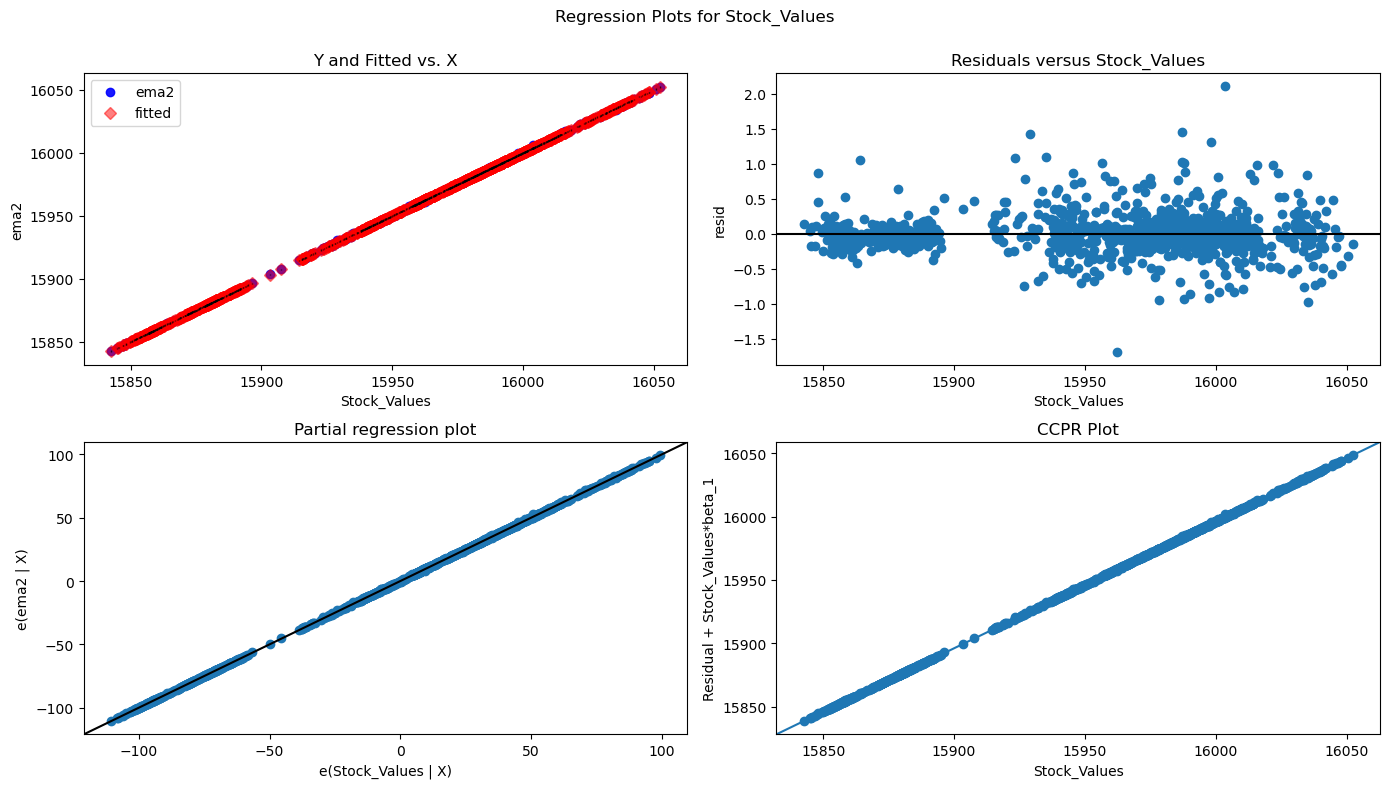

In [151]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# reading the csv file
# data = pd.read_csv('headbrain3.csv')
  
# fit simple linear regression model
linear_model = ols("ema2 ~ Stock_Values", data=new).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    1,
                                    fig=fig)

In [152]:
ans=linear_model.resid

In [153]:
ans

0      -0.002195
1      -0.002195
2      -0.002195
3      -0.002195
4      -0.002195
          ...   
1363   -0.038746
1364    0.004173
1365   -0.014619
1366   -0.035356
1367    0.003824
Length: 1368, dtype: float64

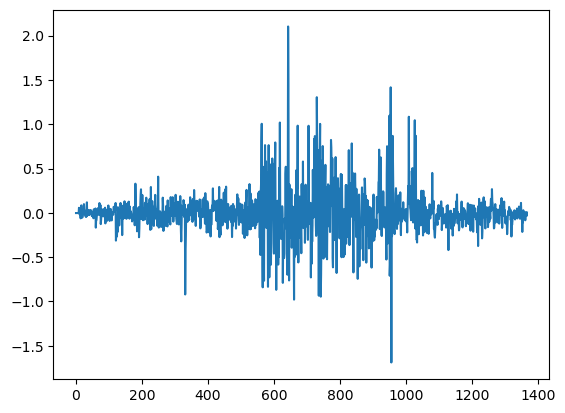

In [154]:
plt.plot(ans)

In [155]:
from statsmodels.tsa.stattools import adfuller

In [156]:
result = adfuller(ans)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.513330
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [157]:
import math 
spread= (ema1)-(ema2)

In [158]:
import scipy.stats as stats

res=stats.zscore(spread)

In [175]:
 temp=pd.DataFrame(data=res)
print(temp.to_string())

      Stock_Values  const  ema2
0         0.018404    NaN   NaN
1         0.018404    NaN   NaN
2         0.018404    NaN   NaN
3         0.018404    NaN   NaN
4         0.018404    NaN   NaN
5         0.018404    NaN   NaN
6         0.018404    NaN   NaN
7         0.018404    NaN   NaN
8         0.018404    NaN   NaN
9        -0.216090    NaN   NaN
10        0.012821    NaN   NaN
11        0.079686    NaN   NaN
12        0.035283    NaN   NaN
13        0.021931    NaN   NaN
14        0.253562    NaN   NaN
15       -0.151764    NaN   NaN
16       -0.325506    NaN   NaN
17       -0.014100    NaN   NaN
18       -0.101602    NaN   NaN
19        0.220619    NaN   NaN
20        0.134539    NaN   NaN
21        0.046592    NaN   NaN
22        0.024048    NaN   NaN
23       -0.156424    NaN   NaN
24       -0.381307    NaN   NaN
25        0.029328    NaN   NaN
26       -0.030091    NaN   NaN
27        0.063554    NaN   NaN
28       -0.085615    NaN   NaN
29        0.164986    NaN   NaN
30      

In [160]:
l=res["Stock_Values"]

In [161]:
ema1


,Stock_Values,ema2,const
0,15963.000000,15963.000000,1
1,15963.000000,15963.000000,1
2,15963.000000,15963.000000,1
3,15963.000000,15963.000000,1
4,15963.000000,15963.000000,1
...,...,...,...
1363,15883.738301,15883.721547,1
1364,15883.302318,15883.328591,1
1365,15883.255605,15883.263099,1
1366,15883.473815,15883.460516,1


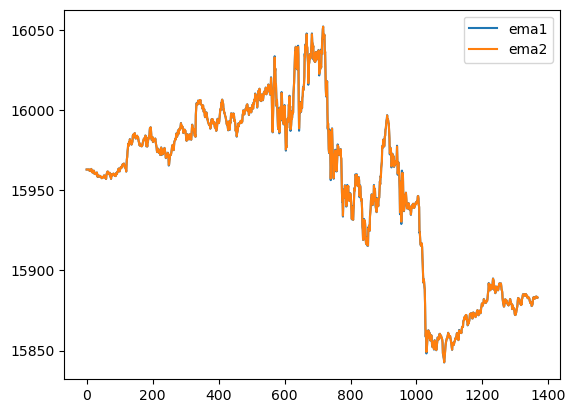

In [162]:
plt.plot(ema1["Stock_Values"])
plt.plot((ema2))
plt.legend(["ema1","ema2"])

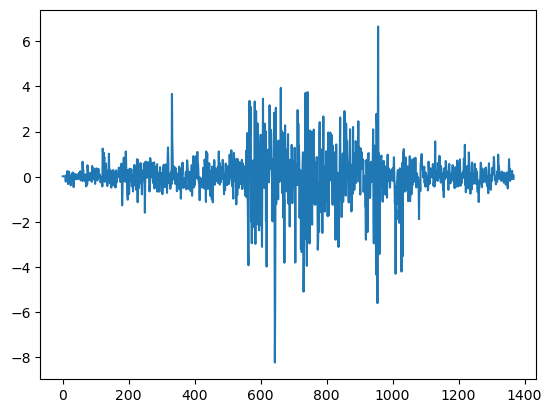

In [163]:
plt.plot(res["Stock_Values"])

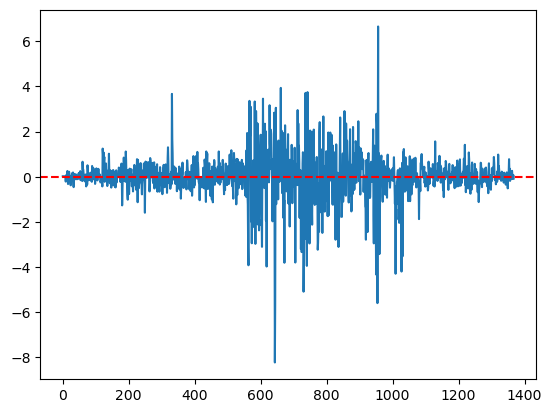

In [164]:
plt.plot(res["Stock_Values"])
plt.axhline(y = 0.0, color = 'r', linestyle = "--")


<Figure size 5000x3000 with 0 Axes>

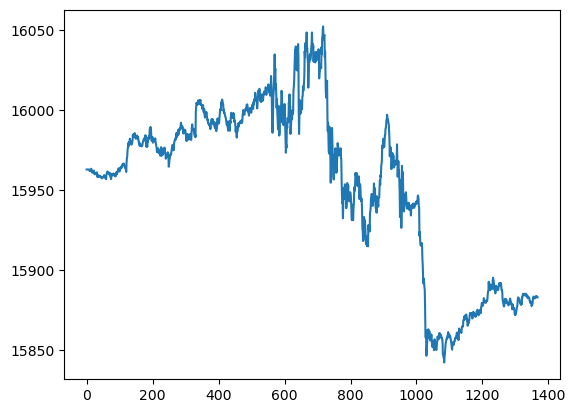

<Figure size 5000x3000 with 0 Axes>

In [165]:
plt.plot(range(0, len(data)),data['Close'])
plt.figure(figsize=(50,30))